# Stroke Prediction

In [114]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

## Data Preparation

### Load Dataset Using Pandas

In [115]:
file = r"/content/dataset.csv"

df = pd.read_csv(file)
print(df)
print(df.info())

          id  gender   age  ...   bmi   smoking_status stroke
0      30669    Male   3.0  ...  18.0              NaN      0
1      30468    Male  58.0  ...  39.2     never smoked      0
2      16523  Female   8.0  ...  17.6              NaN      0
3      56543  Female  70.0  ...  35.9  formerly smoked      0
4      46136    Male  14.0  ...  19.1              NaN      0
...      ...     ...   ...  ...   ...              ...    ...
43395  56196  Female  10.0  ...  20.4     never smoked      0
43396   5450  Female  56.0  ...  55.4  formerly smoked      0
43397  28375  Female  82.0  ...  28.9  formerly smoked      0
43398  27973    Male  40.0  ...  33.2     never smoked      0
43399  36271  Female  82.0  ...  20.6     never smoked      0

[43400 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 

### Check Attribute Unique Values

In [116]:
print(df[["gender", "id"]].groupby(["gender"]).count())
#print("\n")
print(df[["hypertension", "id"]].groupby(["hypertension"]).count())
#print("\n")
print(df[["heart_disease", "id"]].groupby(["heart_disease"]).count())
#print("\n")
print(df[["work_type", "id"]].groupby(["work_type"]).count())
#print("\n")
print(df[["Residence_type", "id"]].groupby(["Residence_type"]).count())
#print("\n")
print(df[["smoking_status", "id"]].groupby(["smoking_status"]).count())
#print("\n")
print(df[["stroke", "id"]].groupby(["stroke"]).count())

           id
gender       
Female  25665
Male    17724
Other      11
                 id
hypertension       
0             39339
1              4061
                  id
heart_disease       
0              41338
1               2062
                  id
work_type           
Govt_job        5440
Never_worked     177
Private        24834
Self-employed   6793
children        6156
                   id
Residence_type       
Rural           21644
Urban           21756
                    id
smoking_status        
formerly smoked   7493
never smoked     16053
smokes            6562
           id
stroke       
0       42617
1         783


### Drop Unnecesary Attributes

In [117]:
attributes = ["ever_married", "work_type", "Residence_type"]
df.drop(attributes, inplace = True, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   avg_glucose_level  43400 non-null  float64
 6   bmi                41938 non-null  float64
 7   smoking_status     30108 non-null  object 
 8   stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 3.0+ MB


### Impute Null Value in BMI

In [118]:
getNull = df[df["bmi"].isnull()]

bmiHealthy = len(getNull[getNull["stroke"] == 0]["stroke"])
bmiStroke = len(getNull[getNull["stroke"] == 1]["stroke"])

print(f"Poeple with null BMI that have stroke: {bmiStroke}")
print(f"Poeple with null BMI that healthy: {bmiHealthy}")

Poeple with null BMI that have stroke: 140
Poeple with null BMI that healthy: 1322


In [119]:
meanHealthyBmi = df[df["stroke"] == 0]["bmi"].mean()
meanStrokeBmi = df[df["stroke"] == 1]["bmi"].mean()

print(f"Mean BMI of healhy people: {meanHealthyBmi}")
print(f"Mean BMI of stroke people: {meanStrokeBmi}")

Mean BMI of healhy people: 28.585371110304212
Mean BMI of stroke people: 29.86811819595645


In [120]:
df.loc[df["stroke"] == 0, "bmi"] = df.loc[df["stroke"] == 0, "bmi"].fillna(meanHealthyBmi)
df.loc[df["stroke"] == 1, "bmi"] = df.loc[df["stroke"] == 1, "bmi"].fillna(meanStrokeBmi)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   avg_glucose_level  43400 non-null  float64
 6   bmi                43400 non-null  float64
 7   smoking_status     30108 non-null  object 
 8   stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 3.0+ MB
None


### Impute Null Value in Smoking Status

In [121]:
imputer = SimpleImputer(strategy="most_frequent")
tempX = df["smoking_status"].values.reshape(-1,1)
imputer = imputer.fit(tempX)
df["smoking_status"] = imputer.transform(tempX)


print(df.info())

print(df[["smoking_status", "id"]].groupby(["smoking_status"]).count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   avg_glucose_level  43400 non-null  float64
 6   bmi                43400 non-null  float64
 7   smoking_status     43400 non-null  object 
 8   stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 3.0+ MB
None
                    id
smoking_status        
formerly smoked   7493
never smoked     29345
smokes            6562


### Remove Other Gender

In [122]:
otherGender = df[df["gender"] == "Other"]
df = df.drop(otherGender.index)

print(df[["gender", "id"]].groupby(["gender"]).count())

           id
gender       
Female  25665
Male    17724


### Gender Comparison

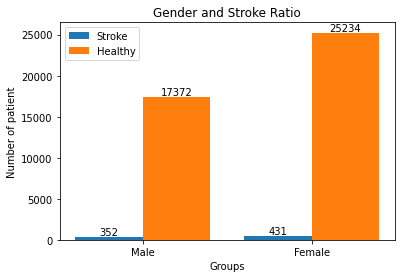

In [123]:
maleHealthy = len(sum(np.where((df.loc[df["gender"] == "Male", "stroke"] == 1) == 0)))
maleStroke = len(sum(np.where((df.loc[df["gender"] == "Male", "stroke"] == 1) == 1)))

femaleHealthy = len(sum(np.where((df.loc[df["gender"] == "Female", "stroke"] == 1) == 0)))
femaleStroke = len(sum(np.where((df.loc[df["gender"] == "Female", "stroke"] == 1) == 1)))

categories = ["Male", "Female"]
haveStroke = [maleStroke,femaleStroke]
isHealthy = [maleHealthy, femaleHealthy]

x_axis = np.arange(len(categories))

bar1 = plt.bar(x_axis - 0.2, haveStroke, 0.4, label = "Stroke")
bar2 = plt.bar(x_axis + 0.2, isHealthy, 0.4, label = "Healthy")

for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

plt.xticks(x_axis, categories)
plt.xlabel("Groups")
plt.ylabel("Number of patient")
plt.title("Gender and Stroke Ratio")
plt.legend()
plt.show()


In [124]:
# Male = 0
# Female = 1

def catGender(row):
    gender = row["gender"]
    if gender == "Male":
        return 0
    if gender == "Female":
        return 1
    
df['gender'] =  df.apply(lambda x: catGender(x), axis = 1)
df.head(10)

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,30669,0,3.0,0,0,95.12,18.0,never smoked,0
1,30468,0,58.0,1,0,87.96,39.2,never smoked,0
2,16523,1,8.0,0,0,110.89,17.6,never smoked,0
3,56543,1,70.0,0,0,69.04,35.9,formerly smoked,0
4,46136,0,14.0,0,0,161.28,19.1,never smoked,0
5,32257,1,47.0,0,0,210.95,50.1,never smoked,0
6,52800,1,52.0,0,0,77.59,17.7,formerly smoked,0
7,41413,1,75.0,0,1,243.53,27.0,never smoked,0
8,15266,1,32.0,0,0,77.67,32.3,smokes,0
9,28674,1,74.0,1,0,205.84,54.6,never smoked,0


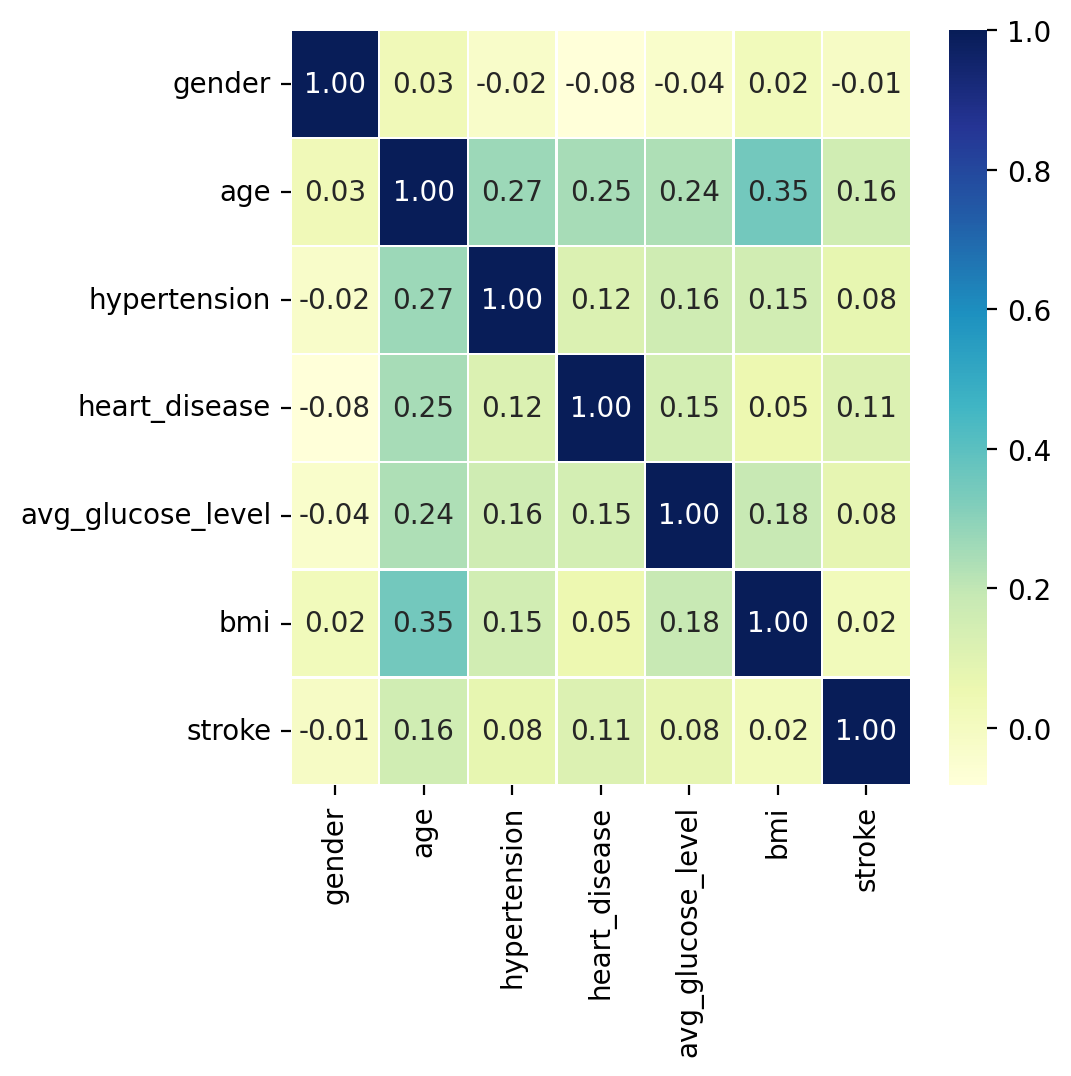

In [125]:
import seaborn as sb
from matplotlib import pyplot

fig, ax = plt.subplots(figsize=(5,5), dpi=200)
dfCo = df[["gender", "age", "hypertension", "heart_disease", "avg_glucose_level", "bmi",  "smoking_status", "stroke"]]

pearsoncorr = dfCo.corr(method='pearson')
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='YlGnBu',
            fmt=".2f",
            annot=True,
            linewidth=0.5,
            ax = ax)

### Stroke and Healthy Comparison

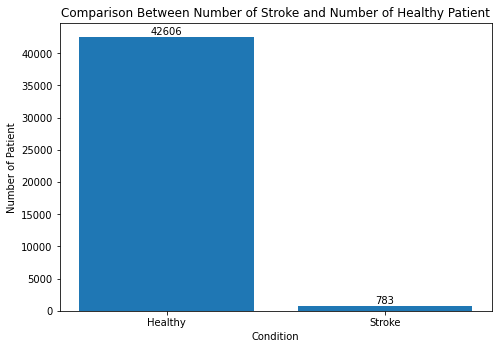

In [126]:
data_1 = df.loc[df["stroke"] == 0]
data_2 = df.loc[df["stroke"] == 1]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
conditions = ["Healthy", "Stroke"]
datas = [len(data_1), len(data_2)]
bar1 = ax.bar(conditions,datas)

for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

plt.title("Comparison Between Number of Stroke and Number of Healthy Patient")
plt.xlabel("Condition")
plt.ylabel("Number of Patient")
plt.show()

### Create Age Classification
* Infants: <1
* Children: 1-11
* Teens: 12-17
* Adults: 18-64
* Elderly: 65+

Reference : https://help.healthycities.org/hc/en-us/articles/219556208-How-are-the-Different-Populations-Defined-

In [127]:
# Return value 1 -> lowest, 5 -> highest
def classAge(row):
  age = row["age"]
  if age < 1:
    return 1
  if age >= 1 and age < 12:
    return 2
  if age >= 12 and age < 18:
    return 3
  if age >= 18 and age < 65:
    return 4
  if age >= 65:
    return 5


df['age_category'] =  df.apply(lambda x: classAge(x), axis = 1)
print(df[["age", "age_category"]].head(10))

    age  age_category
0   3.0             2
1  58.0             4
2   8.0             2
3  70.0             5
4  14.0             3
5  47.0             4
6  52.0             4
7  75.0             5
8  32.0             4
9  74.0             5


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


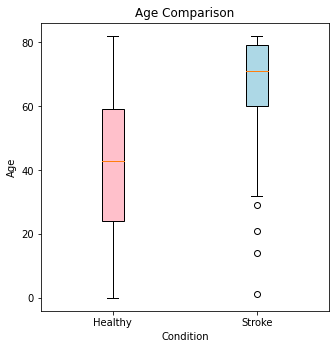

In [128]:
data_1 = df.loc[df["stroke"] == 0, "age"]
data_2 = df.loc[df["stroke"] == 1, "age"]

data = [data_1, data_2]
labels = ["Healthy", "Stroke"]

fig = plt.figure(figsize =(4, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, patch_artist=True, labels=labels)

colors = ['pink', 'lightblue']
for patch, color in zip(bp['boxes'], colors):
  patch.set_facecolor(color)

plt.title("Age Comparison")
plt.xlabel("Condition")
plt.ylabel("Age")
plt.show()

### Classify Glucose Level

* Normal: <140mg/dL
* Prediabetes: 140 – 199 mg/dL
* Diabetes: >= 200mg/dL

Reference : https://www.cdc.gov/diabetes/basics/getting-tested.html

In [129]:
# Return value 1 -> lowest, 3 -> highest
def classGlucose(row):
  glucose = row["avg_glucose_level"]
  if glucose < 140:
    return 1
  if glucose >= 140 and glucose < 200:
    return 2
  if glucose >= 200:
    return 3


df['glucose_category'] =  df.apply(lambda x: classGlucose(x), axis = 1)
print(df[["avg_glucose_level", "glucose_category"]].head(10))

   avg_glucose_level  glucose_category
0              95.12                 1
1              87.96                 1
2             110.89                 1
3              69.04                 1
4             161.28                 2
5             210.95                 3
6              77.59                 1
7             243.53                 3
8              77.67                 1
9             205.84                 3


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


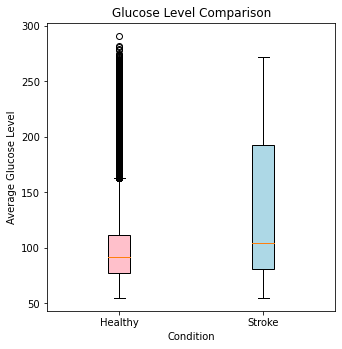

In [130]:

data_1 = df.loc[df["stroke"] == 0, "avg_glucose_level"]
data_2 = df.loc[df["stroke"] == 1, "avg_glucose_level"]

data = [data_1, data_2]
labels = ["Healthy", "Stroke"]

fig = plt.figure(figsize =(4, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, patch_artist=True, labels=labels)

colors = ['pink', 'lightblue']
for patch, color in zip(bp['boxes'], colors):
  patch.set_facecolor(color)

plt.title("Glucose Level Comparison")
plt.xlabel("Condition")
plt.ylabel("Average Glucose Level")
plt.show()

### BMI Classification

* Underweight: <18.5
* Healthy Weight: 18.5-25
* Overweight: 25-30
* Obesity: >30

Reference: https://www.cdc.gov/obesity/adult/defining.html

In [131]:
# Return value 1 -> lowest, 4 -> highest
def classBmi(row):
  bmi = row["bmi"]
  if bmi < 18.5:
    return 1
  if bmi >= 18.5 and bmi < 25:
    return 2
  if bmi >= 25 and bmi < 30:
    return 3
  if bmi >= 30:
    return 4


df['bmi_category'] =  df.apply(lambda x: classBmi(x), axis = 1)
print(df[["bmi", "bmi_category"]].head(10))

    bmi  bmi_category
0  18.0             1
1  39.2             4
2  17.6             1
3  35.9             4
4  19.1             2
5  50.1             4
6  17.7             1
7  27.0             3
8  32.3             4
9  54.6             4


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


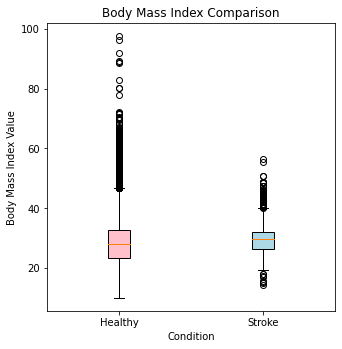

In [132]:

data_1 = df.loc[df["stroke"] == 0, "bmi"]
data_2 = df.loc[df["stroke"] == 1, "bmi"]

data = [data_1, data_2]
labels = ["Healthy", "Stroke"]

fig = plt.figure(figsize =(4, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, patch_artist=True, labels=labels)
 
colors = ['pink', 'lightblue']
for patch, color in zip(bp['boxes'], colors):
  patch.set_facecolor(color)
 
plt.title("Body Mass Index Comparison")
plt.xlabel("Condition")
plt.ylabel("Body Mass Index Value")
plt.show()

### Smoking Status

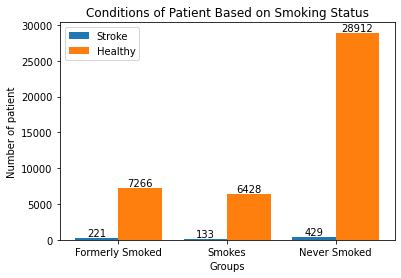

In [133]:
formSmokeStroke = len(sum(np.where((df.loc[df["smoking_status"] == "formerly smoked", "stroke"] == 1) == 1)))
formSmokeHealthy = len(sum(np.where((df.loc[df["smoking_status"] == "formerly smoked", "stroke"] == 1) == 0)))

smokesStroke = len(sum(np.where((df.loc[df["smoking_status"] == "smokes", "stroke"] == 1) == 1)))
smokesHealthy = len(sum(np.where((df.loc[df["smoking_status"] == "smokes", "stroke"] == 1) == 0)))

neverSmokesStroke = len(sum(np.where((df.loc[df["smoking_status"] == "never smoked", "stroke"] == 1) == 1)))
neverSmokesHealthy = len(sum(np.where((df.loc[df["smoking_status"] == "never smoked", "stroke"] == 1) == 0)))

categories = ["Formerly Smoked", "Smokes", "Never Smoked"]
haveStroke = [formSmokeStroke, smokesStroke, neverSmokesStroke]
isHealthy = [formSmokeHealthy, smokesHealthy, neverSmokesHealthy]

x_axis = np.arange(len(categories))

bar1 = plt.bar(x_axis - 0.2, haveStroke, 0.4, label = "Stroke")
bar2 = plt.bar(x_axis + 0.2, isHealthy, 0.4, label = "Healthy")

for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

plt.xticks(x_axis, categories)
plt.xlabel("Groups")
plt.ylabel("Number of patient")
plt.title("Conditions of Patient Based on Smoking Status")
plt.legend()
plt.show()

### Hypertension Status

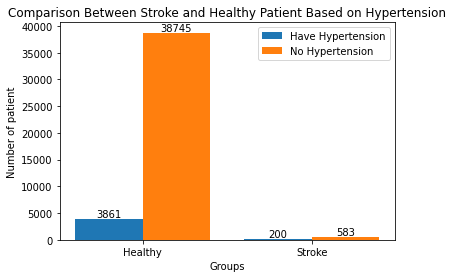

In [134]:
highStroke = len(sum(np.where((df.loc[df["hypertension"] == 1, "stroke"] == 1) == 1)))
highHealthy = len(sum(np.where((df.loc[df["hypertension"] == 1, "stroke"] == 1) == 0)))

noHighStroke = len(sum(np.where((df.loc[df["hypertension"] == 0, "stroke"] == 1) == 1)))
noHighHealthy = len(sum(np.where((df.loc[df["hypertension"] == 0, "stroke"] == 1) == 0)))

categories = [ "Healthy", "Stroke"]
haveHyper = [highHealthy, highStroke]
noHyper = [noHighHealthy, noHighStroke]

x_axis = np.arange(len(categories))

bar1 = plt.bar(x_axis - 0.2, haveHyper, 0.4, label = "Have Hypertension")
bar2 = plt.bar(x_axis + 0.2, noHyper, 0.4, label = "No Hypertension")

for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

plt.xticks(x_axis, categories)
plt.xlabel("Groups")
plt.ylabel("Number of patient")
plt.title("Comparison Between Stroke and Healthy Patient Based on Hypertension")
plt.legend()
plt.show()

In [135]:
# Formerly Smoked = 0
# Smokes = 1
# Never Smoked = 2

def catGender(row):
    gender = row["smoking_status"]
    if gender == "formerly smoked":
        return 0
    if gender == "smokes":
        return 1
    if gender == "never smoked":
        return 2
    
df['smoking_status'] =  df.apply(lambda x: catGender(x), axis = 1)
df.head(10)

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,age_category,glucose_category,bmi_category
0,30669,0,3.0,0,0,95.12,18.0,2,0,2,1,1
1,30468,0,58.0,1,0,87.96,39.2,2,0,4,1,4
2,16523,1,8.0,0,0,110.89,17.6,2,0,2,1,1
3,56543,1,70.0,0,0,69.04,35.9,0,0,5,1,4
4,46136,0,14.0,0,0,161.28,19.1,2,0,3,2,2
5,32257,1,47.0,0,0,210.95,50.1,2,0,4,3,4
6,52800,1,52.0,0,0,77.59,17.7,0,0,4,1,1
7,41413,1,75.0,0,1,243.53,27.0,2,0,5,3,3
8,15266,1,32.0,0,0,77.67,32.3,1,0,4,1,4
9,28674,1,74.0,1,0,205.84,54.6,2,0,5,3,4


## Data Processing

### First Test

In this part, we use gender, age_category, hypertension, heart_disease, glucose_category, bmi cateogry, and smoking_status as the features. We use stroke as our label.

#### Data Splitting

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

featureCols = ["gender", "age_category", "hypertension", "heart_disease", "glucose_category", "bmi_category", "smoking_status"]

X = df[featureCols].copy()
y = df["stroke"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)

#### Data Balancing

In [137]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

sm = SMOTE(random_state = 100)

X_smote, y_smote = sm.fit_resample(X_train, y_train)

sc = StandardScaler()

X_smote = sc.fit_transform(X_smote)
X_test = sc.transform(X_test)

#### Gaussian Naive Bayes

Naive Bayes accuracy: 0.7872013520780518
              precision    recall  f1-score   support

           0      0.992     0.790     0.879     12778
           1      0.055     0.661     0.102       239

    accuracy                          0.787     13017
   macro avg      0.524     0.725     0.491     13017
weighted avg      0.975     0.787     0.865     13017



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[10089,  2689],
       [   81,   158]])

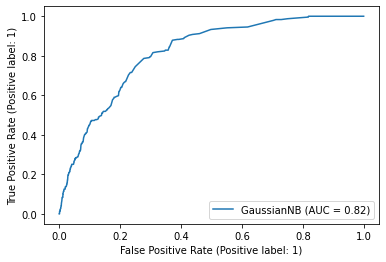

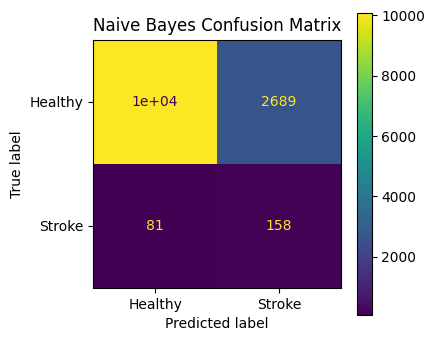

In [138]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import metrics

gnb = GaussianNB()

# Train Model
gnb.fit(X_smote, y_smote)

# Predict Result
y_pred_gnb = gnb.predict(X_test)


# Calculate Predictive Model Performance
print("Naive Bayes accuracy:", accuracy_score(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb, digits=3))

# ROC Curve
plot_roc_curve(gnb, X_test, y_test)

# Confusion Matrix
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
plt.title("Naive Bayes Confusion Matrix")
metrics.plot_confusion_matrix(gnb, X_test, y_test, display_labels=["Healthy", "Stroke"], ax=ax)
confusion_matrix(y_test, y_pred_gnb)

#### Logistic Regression

Logistic Regression accuracy: 0.7934239840208958
              precision    recall  f1-score   support

           0      0.994     0.794     0.883     12778
           1      0.064     0.753     0.118       239

    accuracy                          0.793     13017
   macro avg      0.529     0.774     0.501     13017
weighted avg      0.977     0.793     0.869     13017



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[10148,  2630],
       [   59,   180]])

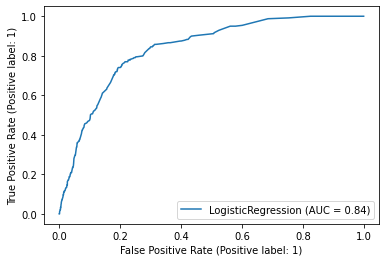

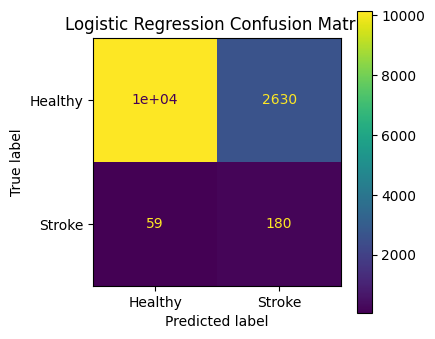

In [139]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# Train Model
logreg.fit(X_smote, y_smote)

# Predict Result
y_pred_logreg = logreg.predict(X_test)


# Calculate Predictive Model Performance
print("Logistic Regression accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, digits=3))

# ROC Curve
plot_roc_curve(logreg, X_test, y_test)

# Confusion Matrix
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
plt.title("Logistic Regression Confusion Matrix")
metrics.plot_confusion_matrix(logreg, X_test, y_test, display_labels=["Healthy", "Stroke"], ax=ax)
confusion_matrix(y_test, y_pred_logreg)

#### Decision Tree

Decision Tree accuracy: 0.7911193055235461
              precision    recall  f1-score   support

           0      0.990     0.795     0.882     12778
           1      0.049     0.565     0.090       239

    accuracy                          0.791     13017
   macro avg      0.519     0.680     0.486     13017
weighted avg      0.973     0.791     0.867     13017



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[10163,  2615],
       [  104,   135]])

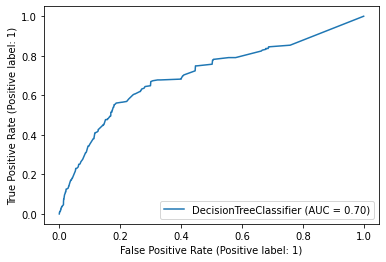

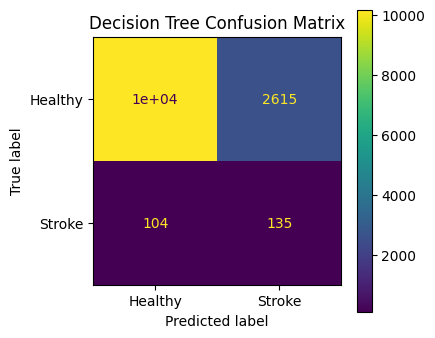

In [140]:
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier()

# Train Model
dtree.fit(X_smote, y_smote)

# Predict Result
y_pred_dtree = dtree.predict(X_test)


# Calculate Predictive Model Performance
print("Decision Tree accuracy:", accuracy_score(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree, digits=3))

# ROC Curve
plot_roc_curve(dtree, X_test, y_test)

# Confusion Matrix
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
plt.title("Decision Tree Confusion Matrix")
metrics.plot_confusion_matrix(dtree, X_test, y_test, display_labels=["Healthy", "Stroke"], ax=ax)
confusion_matrix(y_test, y_pred_dtree)

### Second Test

In this part, we use gender, hypertension, glucose_category, bmi cateogry, and smoking_status as the features. We use stroke as our label.

#### Data Splitting

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

featureCols = ["gender", "hypertension", "glucose_category", "bmi_category", "smoking_status"]

X = df[featureCols].copy()
y = df["stroke"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)

#### Data Balancing

In [142]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

sm = SMOTE(random_state = 100)

X_smote, y_smote = sm.fit_resample(X_train, y_train)

sc = StandardScaler()

X_smote = sc.fit_transform(X_smote)
X_test = sc.transform(X_test)

#### Gaussian Naive Bayes

Naive Bayes accuracy: 0.7258969040485519
              precision    recall  f1-score   support

           0      0.989     0.729     0.839     12778
           1      0.039     0.586     0.073       239

    accuracy                          0.726     13017
   macro avg      0.514     0.657     0.456     13017
weighted avg      0.972     0.726     0.825     13017



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[9309, 3469],
       [  99,  140]])

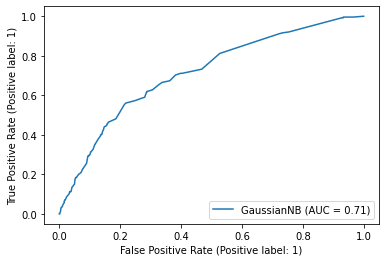

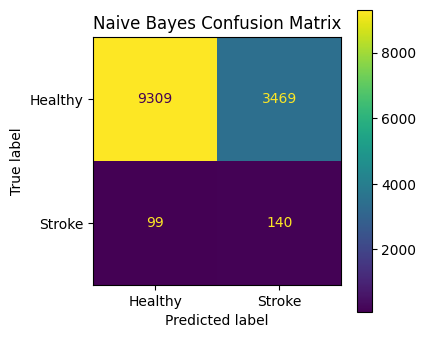

In [143]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import metrics

gnb = GaussianNB()

# Train Model
gnb.fit(X_smote, y_smote)

# Predict Result
y_pred_gnb = gnb.predict(X_test)


# Calculate Predictive Model Performance
print("Naive Bayes accuracy:", accuracy_score(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb, digits=3))

# ROC Curve
plot_roc_curve(gnb, X_test, y_test)

# Confusion Matrix
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
plt.title("Naive Bayes Confusion Matrix")
metrics.plot_confusion_matrix(gnb, X_test, y_test, display_labels=["Healthy", "Stroke"], ax=ax)
confusion_matrix(y_test, y_pred_gnb)

#### Logistic Regression

Logistic Regression accuracy: 0.7026196512253208
              precision    recall  f1-score   support

           0      0.990     0.704     0.823     12778
           1      0.038     0.628     0.072       239

    accuracy                          0.703     13017
   macro avg      0.514     0.666     0.447     13017
weighted avg      0.973     0.703     0.809     13017



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[8996, 3782],
       [  89,  150]])

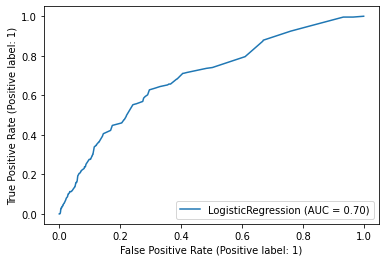

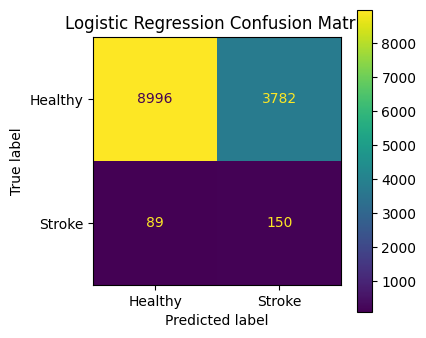

In [144]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# Train Model
logreg.fit(X_smote, y_smote)

# Predict Result
y_pred_logreg = logreg.predict(X_test)


# Calculate Predictive Model Performance
print("Logistic Regression accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, digits=3))

# ROC Curve
plot_roc_curve(logreg, X_test, y_test)

# Confusion Matrix
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
plt.title("Logistic Regression Confusion Matrix")
metrics.plot_confusion_matrix(logreg, X_test, y_test, display_labels=["Healthy", "Stroke"], ax=ax)
confusion_matrix(y_test, y_pred_logreg)

#### Decision Tree

Decision Tree accuracy: 0.7298148574940463
              precision    recall  f1-score   support

           0      0.989     0.733     0.842     12778
           1      0.038     0.569     0.072       239

    accuracy                          0.730     13017
   macro avg      0.514     0.651     0.457     13017
weighted avg      0.972     0.730     0.828     13017



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[9364, 3414],
       [ 103,  136]])

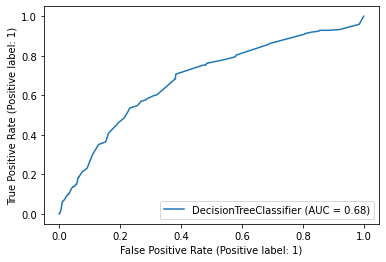

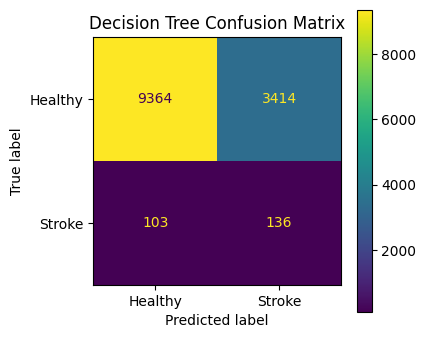

In [145]:
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier()

# Train Model
dtree.fit(X_smote, y_smote)

# Predict Result
y_pred_dtree = dtree.predict(X_test)


# Calculate Predictive Model Performance
print("Decision Tree accuracy:", accuracy_score(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree, digits=3))

# ROC Curve
plot_roc_curve(dtree, X_test, y_test)

# Confusion Matrix
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
plt.title("Decision Tree Confusion Matrix")
metrics.plot_confusion_matrix(dtree, X_test, y_test, display_labels=["Healthy", "Stroke"], ax=ax)
confusion_matrix(y_test, y_pred_dtree)

### Third Test

In this part, we use age_category, hypertension, heart_disease, and glucose_category as the features. And stroke as our label.

#### Data Splitting

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

featureCols = ["age_category", "hypertension", "heart_disease", "glucose_category"]

X = df[featureCols].copy()
y = df["stroke"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)

#### Data Balancing

In [147]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

sm = SMOTE(random_state = 100)

X_smote, y_smote = sm.fit_resample(X_train, y_train)

sc = StandardScaler()

X_smote = sc.fit_transform(X_smote)
X_test = sc.transform(X_test)

#### Gaussian Naive Bayes

Naive Bayes accuracy: 0.8161634785280787
              precision    recall  f1-score   support

           0      0.991     0.821     0.898     12778
           1      0.057     0.582     0.104       239

    accuracy                          0.816     13017
   macro avg      0.524     0.701     0.501     13017
weighted avg      0.973     0.816     0.883     13017



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[10485,  2293],
       [  100,   139]])

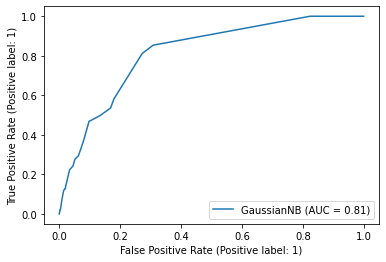

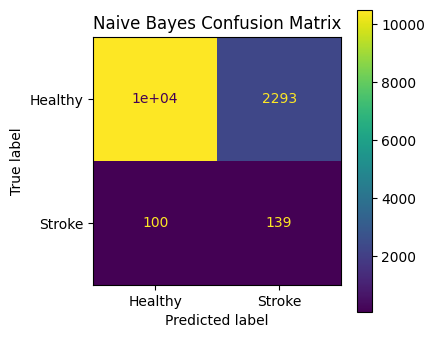

In [148]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import metrics

gnb = GaussianNB()

# Train Model
gnb.fit(X_smote, y_smote)

# Predict Result
y_pred_gnb = gnb.predict(X_test)


# Calculate Predictive Model Performance
print("Naive Bayes accuracy:", accuracy_score(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb, digits=3))

# ROC Curve
plot_roc_curve(gnb, X_test, y_test)

# Confusion Matrix
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
plt.title("Naive Bayes Confusion Matrix")
metrics.plot_confusion_matrix(gnb, X_test, y_test, display_labels=["Healthy", "Stroke"], ax=ax)
confusion_matrix(y_test, y_pred_gnb)

#### Logistic Regression

Logistic Regression accuracy: 0.7914265959898594
              precision    recall  f1-score   support

           0      0.994     0.792     0.882     12778
           1      0.063     0.749     0.116       239

    accuracy                          0.791     13017
   macro avg      0.529     0.771     0.499     13017
weighted avg      0.977     0.791     0.868     13017



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[10123,  2655],
       [   60,   179]])

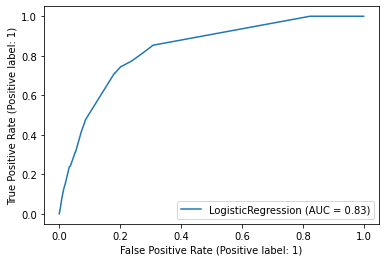

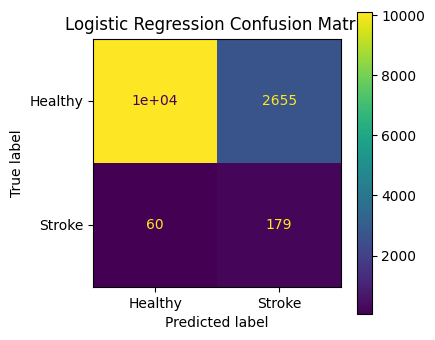

In [149]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# Train Model
logreg.fit(X_smote, y_smote)

# Predict Result
y_pred_logreg = logreg.predict(X_test)


# Calculate Predictive Model Performance
print("Logistic Regression accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, digits=3))

# ROC Curve
plot_roc_curve(logreg, X_test, y_test)

# Confusion Matrix
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
plt.title("Logistic Regression Confusion Matrix")
metrics.plot_confusion_matrix(logreg, X_test, y_test, display_labels=["Healthy", "Stroke"], ax=ax)
confusion_matrix(y_test, y_pred_logreg)

#### Decision Tree

Decision Tree accuracy: 0.7627717600061458
              precision    recall  f1-score   support

           0      0.994     0.763     0.863     12778
           1      0.057     0.766     0.106       239

    accuracy                          0.763     13017
   macro avg      0.526     0.764     0.485     13017
weighted avg      0.977     0.763     0.849     13017



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[9746, 3032],
       [  56,  183]])

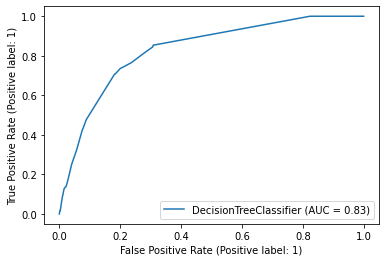

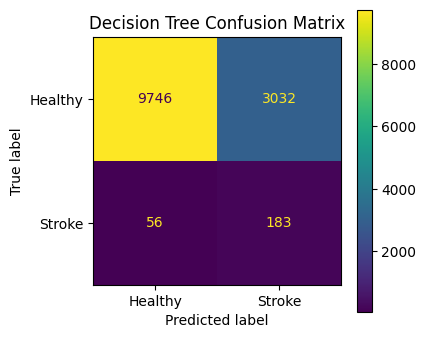

In [150]:
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier()

# Train Model
dtree.fit(X_smote, y_smote)

# Predict Result
y_pred_dtree = dtree.predict(X_test)


# Calculate Predictive Model Performance
print("Decision Tree accuracy:", accuracy_score(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree, digits=3))

# ROC Curve
plot_roc_curve(dtree, X_test, y_test)

# Confusion Matrix
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
plt.title("Decision Tree Confusion Matrix")
metrics.plot_confusion_matrix(dtree, X_test, y_test, display_labels=["Healthy", "Stroke"], ax=ax)
confusion_matrix(y_test, y_pred_dtree)